In [1]:
%pylab inline
from pandas import Series, DataFrame
import pandas_datareader.data as web
from app import create_app
from app.analysis import Quote
from app.m1 import M1Portfolio
app = create_app()

Populating the interactive namespace from numpy and matplotlib


In [2]:
with app.app_context():
    m1 = Series({d: v for d, v, *_ in M1Portfolio.net_value_series(126)})
sp = web.DataReader('SPY', 'yahoo', m1.index[0])['Adj Close']
data = DataFrame({'m1': m1, 'sp': sp}).dropna()
data['m1'] *= 100 / data['m1'][0]
data['sp'] *= 100 / data['sp'][0]

,count,mean,std,min,25%,50%,75%,max,sharpe,yield,drawdown
m1,50.0,0.575734,1.742675,-2.910095,-0.557942,0.800956,1.817223,4.518012,0.330374,2.221857,4.026309
sp,50.0,0.068340,2.465118,-4.726412,-1.460424,0.263004,1.707178,4.686678,0.027723,-0.681341,6.022979


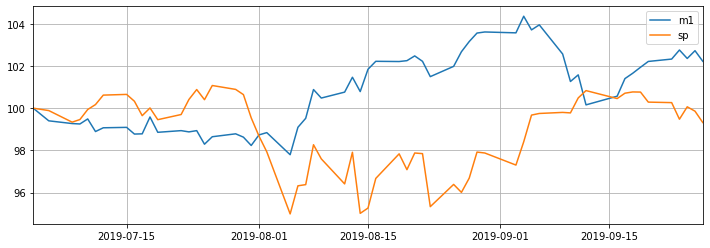

In [3]:
data.plot(figsize=(12, 4), grid=1)
stat = (data.pct_change(10) * 100).describe().T
stat['sharpe'] = stat['mean'] / stat['std']
stat['yield'] = data.T[data.index[-1]] / data.T[data.index[0]] * 100 - 100
stat['drawdown'] = data.apply(Quote._max_drawdown)
stat